# Running cross-validation to estimate performance of system

In [1]:
# Import
import sys
sys.path.append('..')
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
%matplotlib inline


load_loc = '/home/sfvn/Dropbox/DeepFactData/annotated/' #SPECIFY PATH TO DATA
with open(load_loc+"data_matrix_sample_programs.pickle",'rb') as f:
        data = pickle.load(f)

## Cross-validation with Tensorflow

Models are implemeted in the `models` folder of the repository (see structure in there). Each model should have a `fit`-method and a `predict`-method. 

The leave-one-program-out cross-validation scheme is implemented in the `utils`-folder. 

In [2]:
import sys
sys.path.append('..')

import tensorflow as tf
from sklearn.metrics import accuracy_score
import numpy as np
from util.utilities import leave_one_program_out_cv
from models.baselines import MyLogisticRegression
from models.baselines import MyMLP
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import f1_score
cv_perf = leave_one_program_out_cv(data, [MyLogisticRegression(), 
                                          MyMLP(hidden_units=5), 
                                          MyMLP(hidden_units=5, class_weights=[1.0,100.0])], 
                                   eval_functions=[accuracy_score, f1_score])
# returns array of size (NUM_PROGRAMS, len(model_list), len(eval_functions))

Welcome to program 1
Number of training examples 2973
Number of test examples 516
Optimization Finished!


/home/sfvn/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization Finished!
Optimization Finished!
Done with training and evaluation! ---
Welcome to program 2
Number of training examples 3258
Number of test examples 231
Optimization Finished!
Optimization Finished!
Optimization Finished!
Done with training and evaluation! ---
Welcome to program 3
Number of training examples 3169
Number of test examples 320
Optimization Finished!
Optimization Finished!
Optimization Finished!
Done with training and evaluation! ---
Welcome to program 4
Number of training examples 3047
Number of test examples 442
Optimization Finished!
Optimization Finished!
Optimization Finished!
Done with training and evaluation! ---
Welcome to program 5
Number of training examples 3172
Number of test examples 317
Optimization Finished!
Optimization Finished!
Optimization Finished!
Done with training and evaluation! ---
Welcome to program 6
Number of training examples 3180
Number of test examples 309
Optimization Finished!
Optimization Finished!
Optimization Finished!
Done

([<matplotlib.axis.XTick at 0x7fc5dbbb5e48>,
 <a list of 3 Text xticklabel objects>)

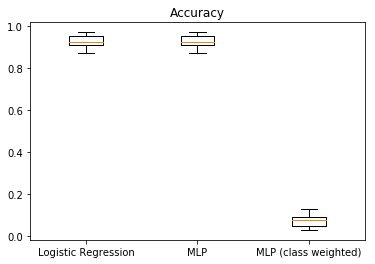

In [7]:
plt.figure()
plt.boxplot(cv_perf[:,:,0])
plt.title('Accuracy')
plt.xticks((1,2,3),('Logistic Regression', 'MLP', 'MLP (class weighted)') ) 


([<matplotlib.axis.XTick at 0x7fc5d955ee80>,
 <a list of 3 Text xticklabel objects>)

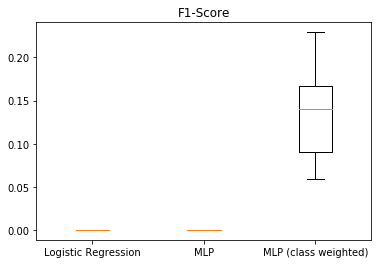

In [8]:
plt.figure()
plt.boxplot(cv_perf[:,:,1])
plt.title('F1-Score')
plt.xticks((1,2,3),('Logistic Regression', 'MLP', 'MLP (class weighted)') ) 